In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.tree import DecisionTreeClassifier
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression



In [2]:
data= pd.read_csv("horse.csv")
data.head(5)

,Unnamed: 0,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
pd.isnull(data).any()

Unnamed: 0               False
age                      False
hospital_number          False
rectal_temp               True
pulse                     True
respiratory_rate          True
temp_of_extremities       True
peripheral_pulse          True
mucous_membrane           True
capillary_refill_time     True
pain                      True
peristalsis               True
abdominal_distention      True
nasogastric_tube          True
nasogastric_reflux        True
nasogastric_reflux_ph     True
rectal_exam_feces         True
abdomen                   True
packed_cell_volume        True
total_protein             True
abdomo_appearance         True
abdomo_protein            True
outcome                  False
surgical_lesion          False
lesion_1                 False
lesion_2                 False
lesion_3                 False
cp_data                  False
dtype: bool

In [4]:
print(data['rectal_temp'])
print(data['rectal_temp'].isnull())

0      38.5
1      39.2
2      38.3
3      39.1
4      37.3
       ... 
294     NaN
295    37.2
296    37.5
297    36.5
298    37.2
Name: rectal_temp, Length: 299, dtype: float64
0      False
1      False
2      False
3      False
4      False
       ...  
294     True
295    False
296    False
297    False
298    False
Name: rectal_temp, Length: 299, dtype: bool


In [5]:
print(data.isnull().sum()) 

Unnamed: 0                 0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
Unnamed: 0               299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null

In [7]:
data.drop('cp_data',axis=1,inplace=True)
 #dropping cp_data as it is of no significance

In [8]:
data.head(5)
#data.loc(2)

,Unnamed: 0,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0


In [9]:
print(data.columns)
#sns.countplot(data['0'],label="Count")
#plt.show()

Index(['Unnamed: 0', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3'],
      dtype='object')


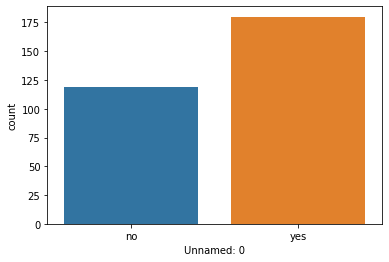

In [10]:
sns.countplot(data['Unnamed: 0'],label="Count")
plt.show()

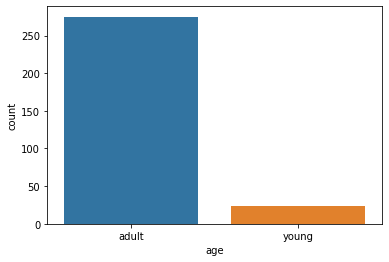

In [11]:
sns.countplot(data['age'],label="Count")
plt.show()

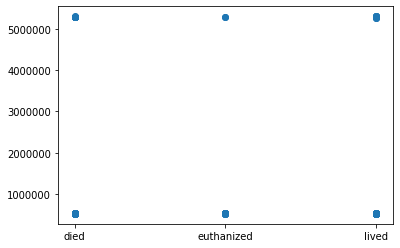

In [12]:
x=data['hospital_number']
y=data['outcome']
plt.scatter(y,x)
plt.show()

c:\users\carolina\desktop\ml_edureka\mlenv\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\carolina\desktop\ml_edureka\mlenv\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'frequency')

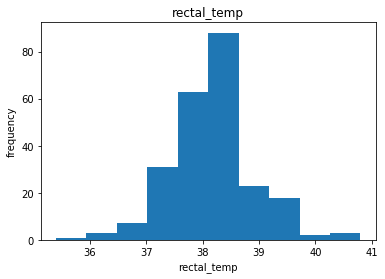

In [13]:
plt.hist(data['rectal_temp'])
plt.title("rectal_temp")
plt.xlabel("rectal_temp")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

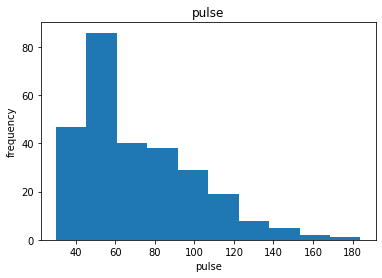

In [14]:
plt.hist(data['pulse'])
plt.title("pulse")
plt.xlabel("pulse")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

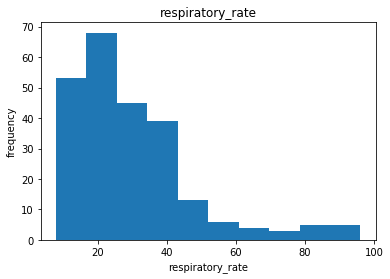

In [15]:
plt.hist(data['respiratory_rate'])
plt.title("respiratory_rate")
plt.xlabel("respiratory_rate")
plt.ylabel("frequency")

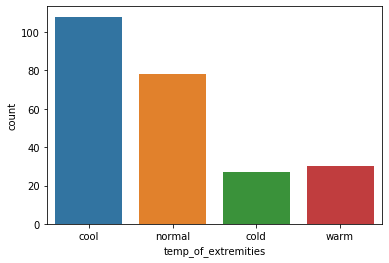

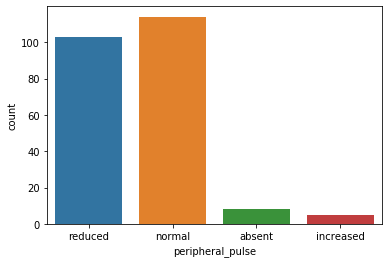

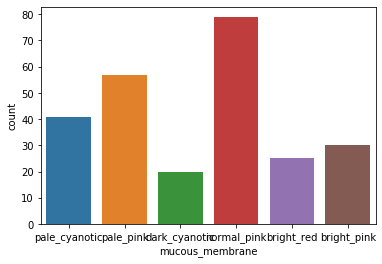

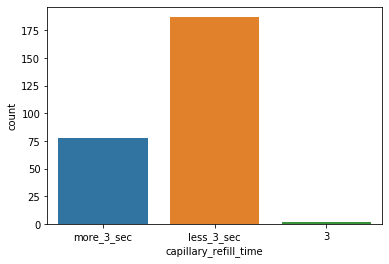

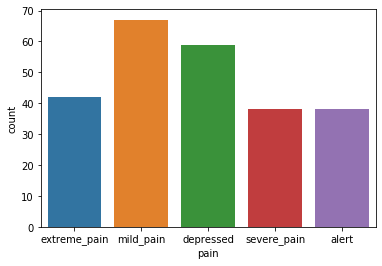

In [16]:
sns.countplot(data['temp_of_extremities'])
plt.show()
sns.countplot(data['peripheral_pulse'])
plt.show()
sns.countplot(data['mucous_membrane'])
plt.show()

sns.countplot(data['capillary_refill_time'])
plt.show()

sns.countplot(data['pain'])
plt.show()

In [17]:
data_categories = data.select_dtypes(include=['object']).copy() #toknowcategorical features in the dataframe
data_categories.columns
print(data_categories.isnull().sum()) 


Unnamed: 0                 0
age                        0
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
rectal_exam_feces        102
abdomen                  118
abdomo_appearance        165
outcome                    0
surgical_lesion            0
dtype: int64


In [18]:
data_categories = data_categories['temp_of_extremities'].fillna(data_categories ['temp_of_extremities'].value_counts().index[0])
#print(data_categories.isnull().sum()) 
print(data_categories ['temp_of_extremities'].value_counts().index[0])
data_categories.head(4)

KeyError: 'temp_of_extremities'

In [20]:
#replacing missing categorical values with the most frequent category using fillna method and method chaining process as described here : https://www.datacamp.com/community/tutorials/categorical-data
labelencoder=LabelEncoder()
data['Unnamed: 0'] = labelencoder.fit_transform(data['Unnamed: 0'])
data['age'] = labelencoder.fit_transform(data['age'])
data['temp_of_extremities'] = labelencoder.fit_transform(data['temp_of_extremities'].fillna(data ['temp_of_extremities'].value_counts().index[0]))
data['peripheral_pulse'] = labelencoder.fit_transform(data['peripheral_pulse'].fillna(data['peripheral_pulse'].value_counts().index[0]))
data['capillary_refill_time'] = labelencoder.fit_transform(data['capillary_refill_time'].fillna(data['capillary_refill_time'].value_counts().index[0]))
data['pain'] = labelencoder.fit_transform(data['pain'].fillna(data['pain'].value_counts().index[0]))
data['peristalsis'] = labelencoder.fit_transform(data['peristalsis'].fillna(data ['peristalsis'].value_counts().index[0]))
data['abdominal_distention'] = labelencoder.fit_transform(data['abdominal_distention'].fillna(data['abdominal_distention'].value_counts().index[0]))
data['nasogastric_tube'] = labelencoder.fit_transform(data['nasogastric_tube'].fillna(data['nasogastric_tube'].value_counts().index[0]))
data['nasogastric_reflux'] = labelencoder.fit_transform(data['nasogastric_reflux'].fillna(data ['nasogastric_reflux'].value_counts().index[0]))
data['rectal_exam_feces'] = labelencoder.fit_transform(data['rectal_exam_feces'].fillna(data ['rectal_exam_feces'].value_counts().index[0]))
data['abdomen'] = labelencoder.fit_transform(data['abdomen'].fillna(data ['abdomen'].value_counts().index[0]))
data['abdomo_appearance'] = labelencoder.fit_transform(data['abdomo_appearance'].fillna(data['abdomo_appearance'].value_counts().index[0]))
data['FFFf'] = labelencoder.fit_transform(data['outcome'])
data['surgical_lesion'] = labelencoder.fit_transform(data['surgical_lesion'])
data['mucous_membrane'] = labelencoder.fit_transform(data['mucous_membrane'].fillna(data['mucous_membrane'].value_counts().index[0]))
#data_categories ['capillary_refill_time'].value_counts().index[0]
data


,Unnamed: 0,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3
0,0,0,530101,38.5,66.0,28.0,1,3,3,2,...,0,45.0,8.4,1,NaN,0,0,11300,0,0
1,1,0,534817,39.2,88.0,20.0,1,2,4,1,...,4,50.0,85.0,1,2.0,1,0,2208,0,0
2,0,0,530334,38.3,40.0,24.0,2,2,5,1,...,3,33.0,6.7,1,NaN,2,0,0,0,0
3,1,1,5290409,39.1,164.0,84.0,0,2,2,2,...,0,48.0,7.2,2,5.3,0,1,2208,0,0
4,0,0,530255,37.3,104.0,35.0,1,2,2,2,...,0,74.0,7.4,1,NaN,0,0,4300,0,0
5,0,0,528355,NaN,NaN,NaN,3,2,5,1,...,2,NaN,NaN,1,NaN,2,0,0,0,0
6,1,0,526802,37.9,48.0,16.0,2,2,3,1,...,0,37.0,7.0,1,NaN,2,1,3124,0,0
7,1,0,529607,NaN,60.0,NaN,1,2,3,1,...,1,44.0,8.3,1,NaN,0,1,2208,0,0
8,0,0,530051,NaN,80.0,36.0,1,0,5,1,...,0,38.0,6.2,1,NaN,1,1,3205,0,0
9,0,1,5299629,38.3,90.0,NaN,2,2,3,1,...,0,40.0,6.2,0,2.2,2,0,0,0,0


In [21]:
print(data.isnull().sum()) 


Unnamed: 0                 0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities        0
peripheral_pulse           0
mucous_membrane            0
capillary_refill_time      0
pain                       0
peristalsis                0
abdominal_distention       0
nasogastric_tube           0
nasogastric_reflux         0
nasogastric_reflux_ph    246
rectal_exam_feces          0
abdomen                    0
packed_cell_volume        29
total_protein             33
abdomo_appearance          0
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
dtype: int64


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 27 columns):
Unnamed: 0               299 non-null int32
age                      299 non-null int32
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      299 non-null int32
peripheral_pulse         299 non-null int32
mucous_membrane          299 non-null int32
capillary_refill_time    299 non-null int32
pain                     299 non-null int32
peristalsis              299 non-null int32
abdominal_distention     299 non-null int32
nasogastric_tube         299 non-null int32
nasogastric_reflux       299 non-null int32
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        299 non-null int32
abdomen                  299 non-null int32
packed_cell_volume       270 non-null float64
total_protein            266 non-null float64
abdo

In [23]:
print(data.isnull().sum())


Unnamed: 0                 0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities        0
peripheral_pulse           0
mucous_membrane            0
capillary_refill_time      0
pain                       0
peristalsis                0
abdominal_distention       0
nasogastric_tube           0
nasogastric_reflux         0
nasogastric_reflux_ph    246
rectal_exam_feces          0
abdomen                    0
packed_cell_volume        29
total_protein             33
abdomo_appearance          0
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
dtype: int64


In [40]:
y=data['outcome']
x=data.drop(['outcome'], axis=1)
#gapminder_ocean.drop(['pop'], axis=1)
y.head(5)
#x.head(5)

0    0
1    1
2    2
3    0
4    0
Name: outcome, dtype: int32

In [41]:
print(x.isnull().sum())
#x.info()
#print(x[19].mode()[0])#mode() returns a series so its essential to take in the first element

Unnamed: 0                 0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities        0
peripheral_pulse           0
mucous_membrane            0
capillary_refill_time      0
pain                       0
peristalsis                0
abdominal_distention       0
nasogastric_tube           0
nasogastric_reflux         0
nasogastric_reflux_ph    246
rectal_exam_feces          0
abdomen                    0
packed_cell_volume        29
total_protein             33
abdomo_appearance          0
abdomo_protein           198
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
dtype: int64


In [42]:
#using fillna

for column in x.columns:
    x[column].fillna(x[column].mode()[0], inplace=True)

In [43]:
print(x.isnull().sum()) #no null values now

Unnamed: 0               0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64


In [44]:


x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.30, random_state =5)

In [45]:
from sklearn.tree import DecisionTreeClassifier
dec_tre=DecisionTreeClassifier()
dec_tre.fit(x_train,y_train)
temp=dec_tre.predict(x_test)
print(metrics.accuracy_score(temp,y_test))

0.6777777777777778


In [101]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=31)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print(metrics.accuracy_score(prediction,y_test))

0.7444444444444445


#from sklearn import svm    		# To import the svm classifier
#from sklearn.metrics import accuracy_score
# ALL Default hyperparameters
#model = svm.SVC(kernel='linear')

#model = svm.SVC(kernel='linear')
#model.fit(x_train,y_train)
#Predict Output
#predicted= model.predict(x_test)
#print("SVM accuray:",accuracy_score(y_test, predicted))

In [ ]:
#logistic = LogisticRegression()
#logistic.fit(x_train,train_y)
#temp=logistic.predict(test_X)
#print(metrics.accuracy_score(temp,test_y))

Correlation of mentioned features wrt outcome in ascending order
outcome                  1.000000
packed_cell_volume       0.421703
pulse                    0.366235
surgical_lesion          0.332933
temp_of_extremities      0.290367
total_protein            0.263209
capillary_refill_time    0.256294
abdomo_appearance        0.243140
abdomo_protein           0.225812
abdomen                  0.214875
nasogastric_reflux_ph    0.196099
rectal_exam_feces        0.193004
Unnamed: 0               0.189222
nasogastric_reflux       0.181422
peristalsis              0.165844
peripheral_pulse         0.165719
pain                     0.161964
abdominal_distention     0.112309
hospital_number          0.106396
age                      0.101782
lesion_1                 0.100738
lesion_2                 0.098993
respiratory_rate         0.089952
mucous_membrane          0.056852
nasogastric_tube         0.049156
lesion_3                 0.044631
rectal_temp              0.019362
Name: outcome, dt

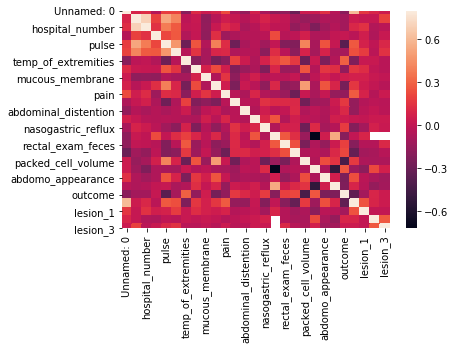

In [35]:
train_corr=data.corr()
sns.heatmap(train_corr, vmax=0.8)
corr_values=train_corr['outcome'].sort_values(ascending=False)
corr_values=abs(corr_values).sort_values(ascending=False)
print("Correlation of mentioned features wrt outcome in ascending order")
print(abs(corr_values).sort_values(ascending=False))